In [13]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'


In [14]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

In [15]:
from torchsummary import summary
import torch
use_cuda=torch.cuda.is_available()
import pytorch
from pytorch import dataset as ptd

import os
import datasets
import pytorch_models
import torch.optim as optim
dataset_name="mnist"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset_name)
dataset=ptd.ClassificationDataset(dataset_name,x_train,x_test,y_train,y_test,num_classes,input_shape)

print('x_train shape:', x_train.shape,x_train.dtype)
print('x_test shape:', x_test.shape,x_test.dtype)
print('y_train shape:', y_train.shape,y_train.dtype)
print('y_test shape:', y_test.shape,y_test.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


import numpy as np
print(np.unique(y_train.argmax(axis=1)))
print(y_train.min(),y_train.max())


Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (60000, 28, 28, 1) uint8
x_test shape: (10000, 28, 28, 1) uint8
y_train shape: (60000, 10) float64
y_test shape: (10000, 10) float64
60000 train samples
10000 test samples
[0 1 2 3 4 5 6 7 8 9]
0.0 1.0


In [19]:
from pytorch import training

import pytorch_models

def get_all_conv():
    filters={"mnist":16,"mnist_rot":32,"cifar10":64,"fashion_mnist":32,"lsa16":16}
    
    
    model = pytorch_models.AllConvolutional(input_shape,num_classes,
                                     filters=filters[dataset.name])

    if use_cuda:
        model=model.cuda()
    parameters=training.add_weight_decay(model.named_parameters(),1e-13)
    optimizer = optim.Adam(parameters, lr=0.0001)
    

    rotated_model=pytorch_models.AllConvolutional(dataset.input_shape,dataset.num_classes,
                                     filters=filters[dataset.name])

    if use_cuda:
        rotated_model= rotated_model.cuda()
    rotated_parameters=training.add_weight_decay(rotated_model.named_parameters(),1e-13)
    rotated_optimizer = optim.Adam(rotated_parameters, lr=0.0001)

    return model,optimizer,parameters,rotated_model,rotated_optimizer,rotated_parameters


def get_simple_conv(dataset,use_cuda):
    conv_filters={"mnist":32,"mnist_rot":32,"cifar10":64,"fashion_mnist":64,"lsa16":32}
    fc_filters={"mnist":64,"mnist_rot":64,"cifar10":128,"fashion_mnist":128,"lsa16":64}
    
    model = pytorch_models.SimpleConv(input_shape,dataset.num_classes,
                                     conv_filters=conv_filters[dataset.name],fc_filters=fc_filters[dataset.name])
    #model= pytorch_models.FFNet(input_shape,num_classes)x
    if use_cuda:
        model=model.cuda()
    parameters=training.add_weight_decay(model.named_parameters(),1e-9)
    optimizer = optim.Adam(parameters, lr=0.001)
    print(model)

    rotated_model= pytorch_models.SimpleConv(dataset.input_shape,dataset.num_classes,
                                           conv_filters=conv_filters[dataset.name],fc_filters=fc_filters[dataset.name])
    if use_cuda:
        rotated_model= rotated_model.cuda()
    rotated_parameters=training.add_weight_decay(rotated_model.named_parameters(),1e-9)
    rotated_optimizer = optim.Adam(rotated_parameters, lr=0.001)
    
def get_model(model_name,dataset,use_cuda):
    name_to_model={"simple_conv":get_simple_conv,"all_conv":get_all_conv}
    return name_to_model[model_name](dataset,use_cuda)
    
model,optimizer,parameters,rotated_model,rotated_optimizer,rotated_parameters=get_model("simple_conv",dataset,use_cuda)
print(model)
print(rotated_model)

SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc): SequentialWithIntermediates(
    (0): Linear(in_features=6272, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)


TypeError: 'NoneType' object is not iterable

Training model with unrotated dataset...


Epoch 1: 100% (batch 469/469)  ==stats==> loss:   2.15, accuracy:  0.221, Time:  0:00:06


Test => Loss: 1.5887, Accuracy: 53.53% (5353/10000)


Epoch 2: 100% (batch 469/469)  ==stats==> loss:   1.19, accuracy:  0.647, Time:  0:00:06


Test => Loss: 0.8864, Accuracy: 72.59% (7259/10000)


Epoch 3: 100% (batch 469/469)  ==stats==> loss:  0.813, accuracy:  0.741, Time:  0:00:06


Test => Loss: 0.7221, Accuracy: 76.21% (7621/10000)


Epoch 4: 100% (batch 469/469)  ==stats==> loss:  0.695, accuracy:  0.771, Time:  0:00:06


Test => Loss: 0.6711, Accuracy: 76.54% (7654/10000)


Epoch 5: 100% (batch 469/469)  ==stats==> loss:  0.635, accuracy:  0.786, Time:  0:00:06


Test => Loss: 0.6114, Accuracy: 78.62% (7862/10000)


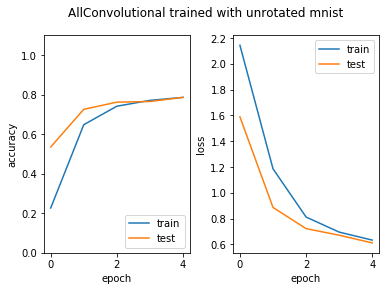

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 469/469)  ==stats==> loss:    2.2, accuracy:  0.181, Time:  0:00:07


Test => Loss: 2.0465, Accuracy: 29.17% (2917/10000)


Epoch 2: 100% (batch 469/469)  ==stats==> loss:   1.97, accuracy:   0.29, Time:  0:00:07


Test => Loss: 1.9016, Accuracy: 30.75% (3075/10000)


Epoch 3: 100% (batch 469/469)  ==stats==> loss:   1.81, accuracy:  0.326, Time:  0:00:07


Test => Loss: 1.7342, Accuracy: 36.90% (3690/10000)


Epoch 4: 100% (batch 469/469)  ==stats==> loss:   1.72, accuracy:  0.365, Time:  0:00:07


Test => Loss: 1.6574, Accuracy: 40.59% (4059/10000)


Epoch 5: 100% (batch 469/469)  ==stats==> loss:   1.65, accuracy:  0.404, Time:  0:00:07


Test => Loss: 1.5780, Accuracy: 41.95% (4195/10000)


Epoch 6: 100% (batch 469/469)  ==stats==> loss:   1.55, accuracy:   0.45, Time:  0:00:07


Test => Loss: 1.4719, Accuracy: 48.11% (4811/10000)


Epoch 7: 100% (batch 469/469)  ==stats==> loss:   1.46, accuracy:  0.492, Time:  0:00:07


Test => Loss: 1.3956, Accuracy: 50.72% (5072/10000)


Epoch 8: 100% (batch 469/469)  ==stats==> loss:   1.38, accuracy:  0.521, Time:  0:00:07


Test => Loss: 1.3305, Accuracy: 53.35% (5335/10000)


Epoch 9: 100% (batch 469/469)  ==stats==> loss:   1.33, accuracy:  0.539, Time:  0:00:07


Test => Loss: 1.2753, Accuracy: 55.73% (5573/10000)


Epoch 10: 100% (batch 469/469)  ==stats==> loss:   1.29, accuracy:  0.554, Time:  0:00:07


Test => Loss: 1.2405, Accuracy: 56.21% (5621/10000)


Epoch 11: 100% (batch 469/469)  ==stats==> loss:   1.26, accuracy:  0.565, Time:  0:00:07


Test => Loss: 1.2070, Accuracy: 57.51% (5751/10000)


Epoch 12: 100% (batch 469/469)  ==stats==> loss:   1.23, accuracy:  0.578, Time:  0:00:07


Test => Loss: 1.1762, Accuracy: 60.88% (6088/10000)


Epoch 13: 100% (batch 469/469)  ==stats==> loss:    1.2, accuracy:  0.589, Time:  0:00:07


Test => Loss: 1.1882, Accuracy: 57.50% (5750/10000)


Epoch 14: 100% (batch 469/469)  ==stats==> loss:   1.19, accuracy:    0.6, Time:  0:00:07


Test => Loss: 1.1827, Accuracy: 58.78% (5878/10000)


Epoch 15: 100% (batch 469/469)  ==stats==> loss:   1.17, accuracy:  0.607, Time:  0:00:07


Test => Loss: 1.1236, Accuracy: 62.06% (6206/10000)


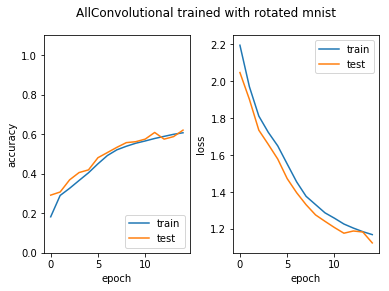

Testing both models on both datasets...


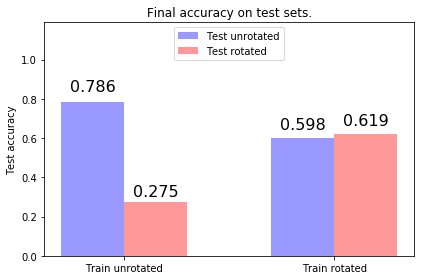

model_rotated_test_dataset score: loss=4.013692, accuracy=0.275300
model_rotated_train_dataset score: loss=4.062075, accuracy=0.267750
model_test_dataset score: loss=0.611436, accuracy=0.786200
model_train_dataset score: loss=0.629258, accuracy=0.784150
rotated_model_rotated_test_dataset score: loss=1.129157, accuracy=0.619200
rotated_model_rotated_train_dataset score: loss=1.148151, accuracy=0.620000
rotated_model_test_dataset score: loss=1.166661, accuracy=0.598400
rotated_model_train_dataset score: loss=1.214859, accuracy=0.592717


In [5]:
batch_size = 128

epochs={'cifar10':70,'mnist':5,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':50,'mnist_rot':5,'pugeault':15}
from pytorch.experiment import rotation
rotated_epochs={'cifar10':120,'mnist':15,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}

config=pytorch.experiment.rotation.TrainRotatedConfig(batch_size=batch_size,
                   epochs=epochs[dataset.name],rotated_epochs=rotated_epochs[dataset.name],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=rotation.run(config,model,rotated_model,dataset,plot_accuracy=True,save_plots=False)
for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [6]:
from pytorch.experiment import invariance
n_rotations=16
rotations=np.linspace(-180,180,n_rotations,endpoint=False)

vmax_class={"lsa16":6,"mnist":5,"cifar10":10}
vmax_all={"lsa16":3.5,"mnist":5,"cifar10":10}

rotated_invariance_measure,rotated_stratified_invariance_measure,classes=invariance.run(rotated_model,dataset,config,rotations)

invariance_measure,stratified_invariance_measure,classes=invariance.run(model,dataset,config,rotations)

vmin_class,vmax_class=invariance.outlier_range_both(rotated_invariance_measure,invariance_measure,iqr_away=5)
vmin_class=0

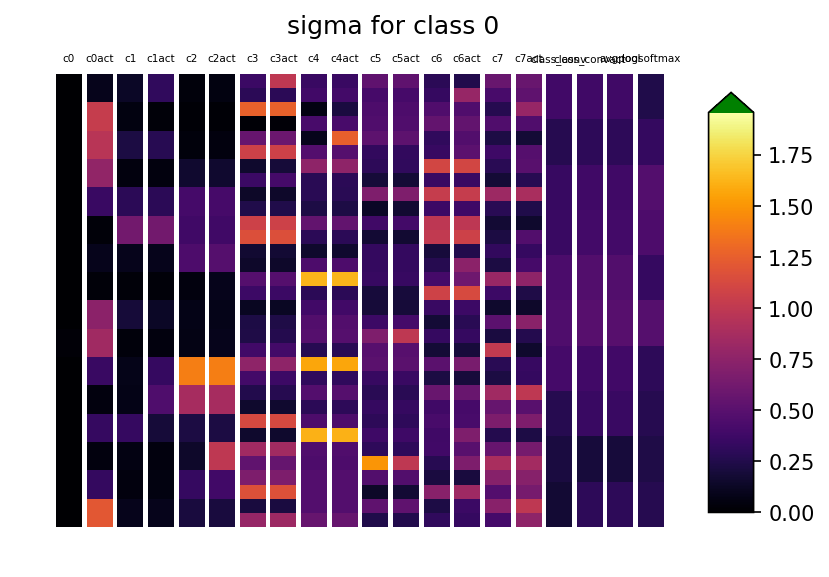

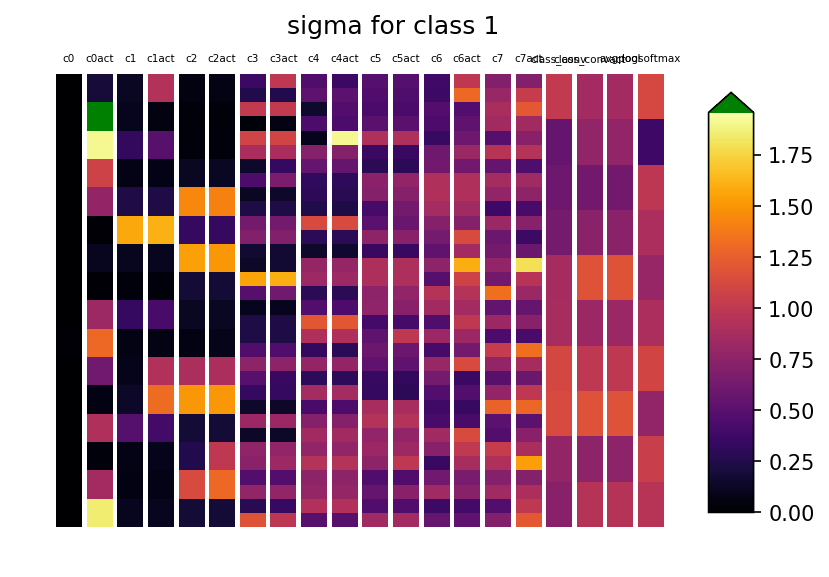

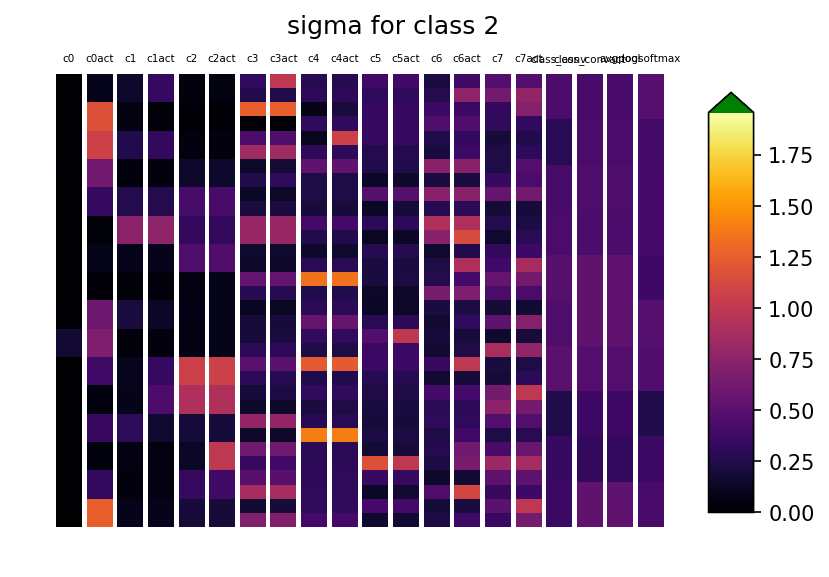

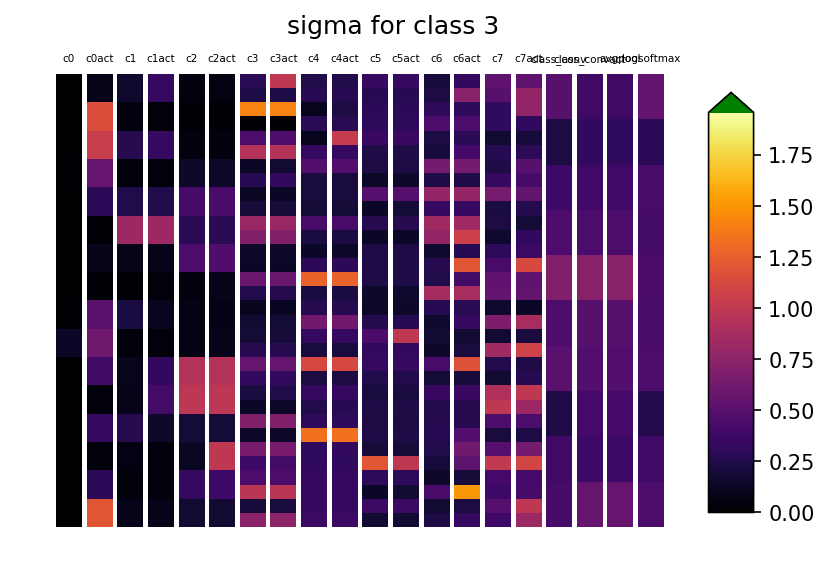

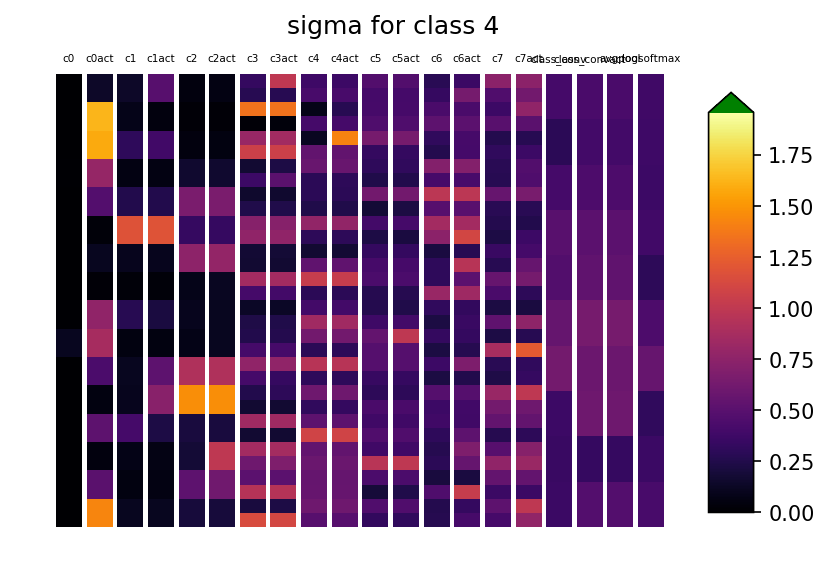

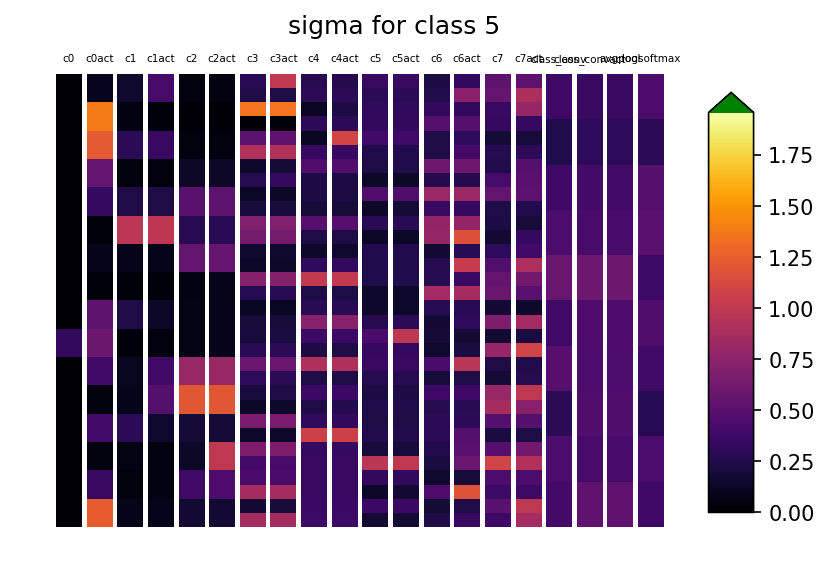

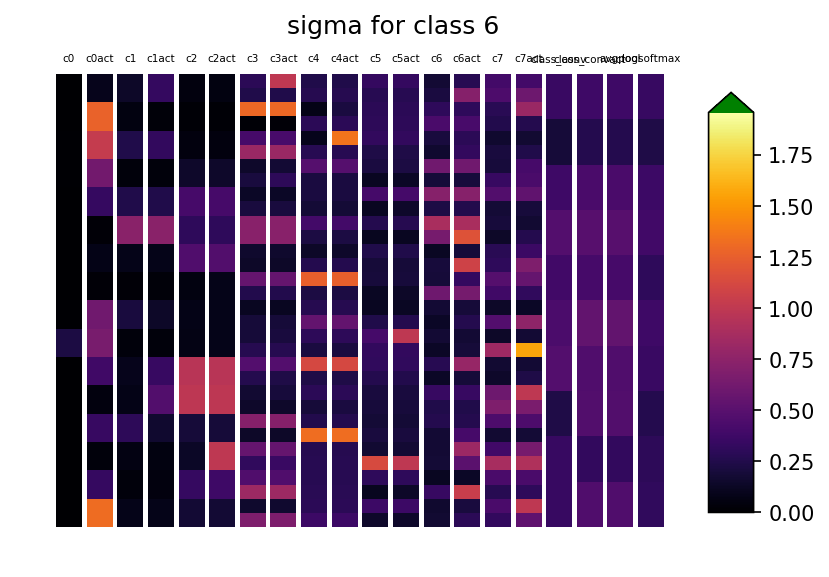

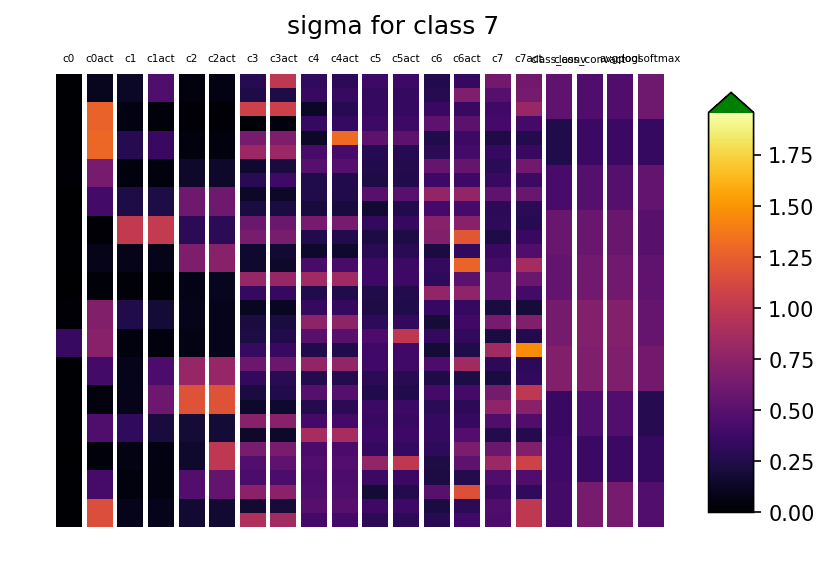

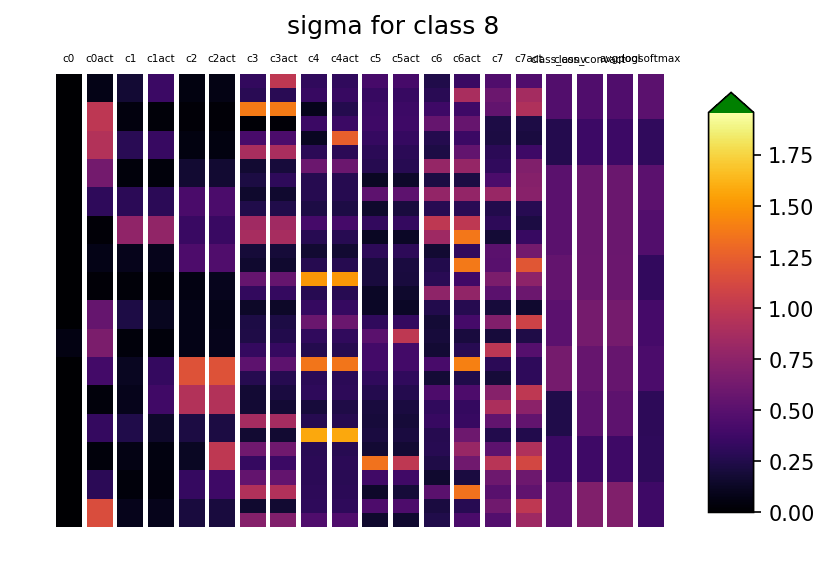

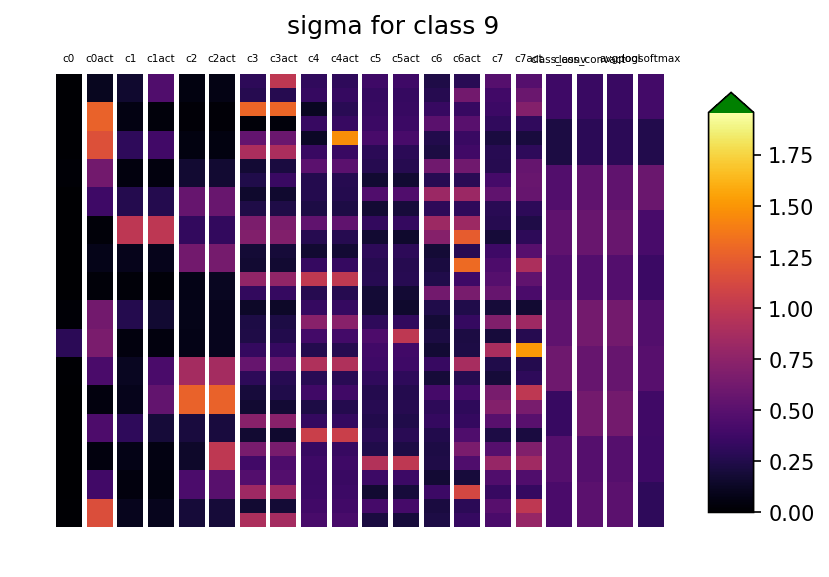

In [7]:
invariance.plot(rotated_invariance_measure,model,dataset.name,classes,savefig=True,savefig_suffix="rotated",vmax=vmax_class)



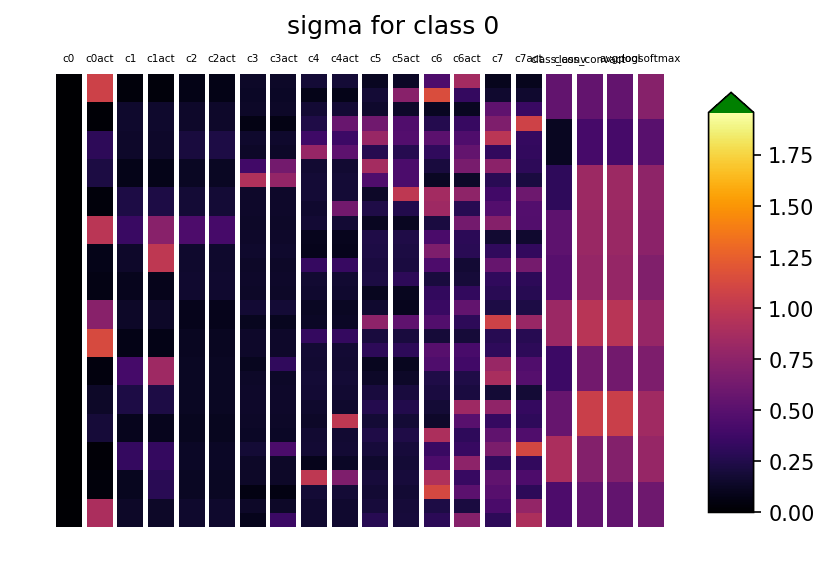

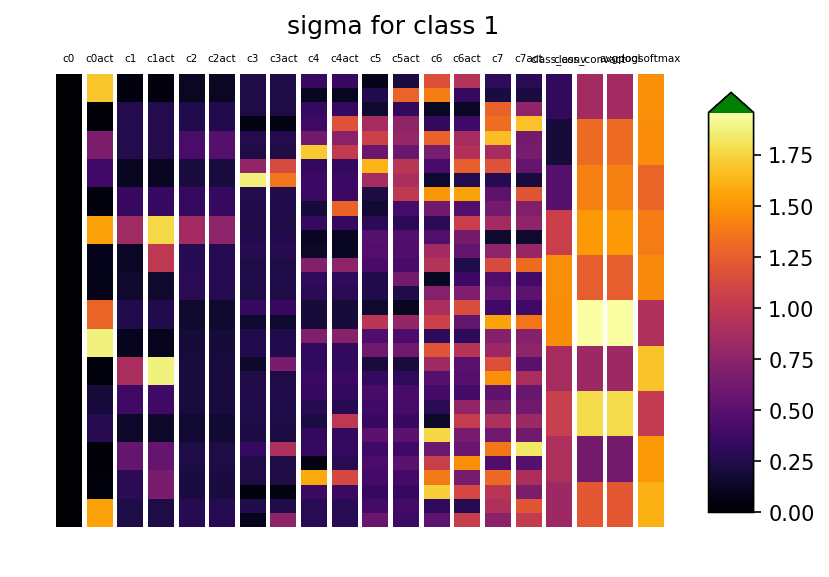

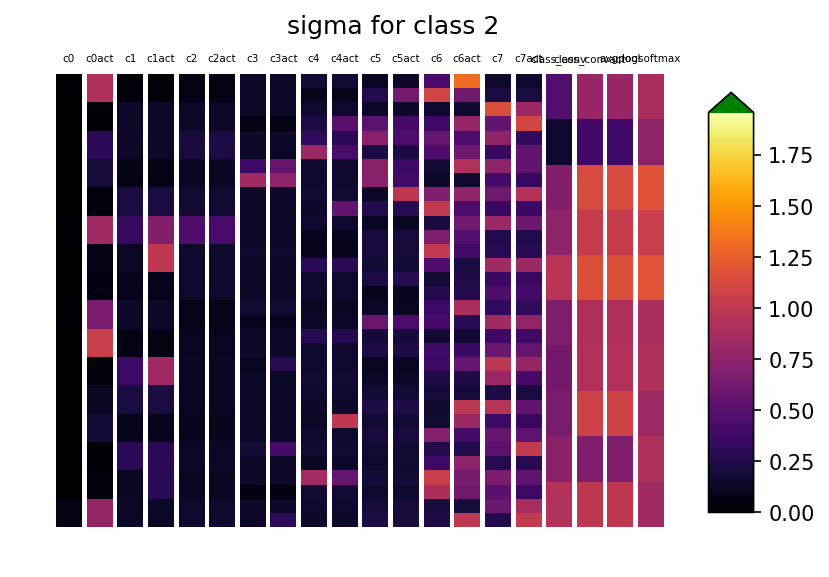

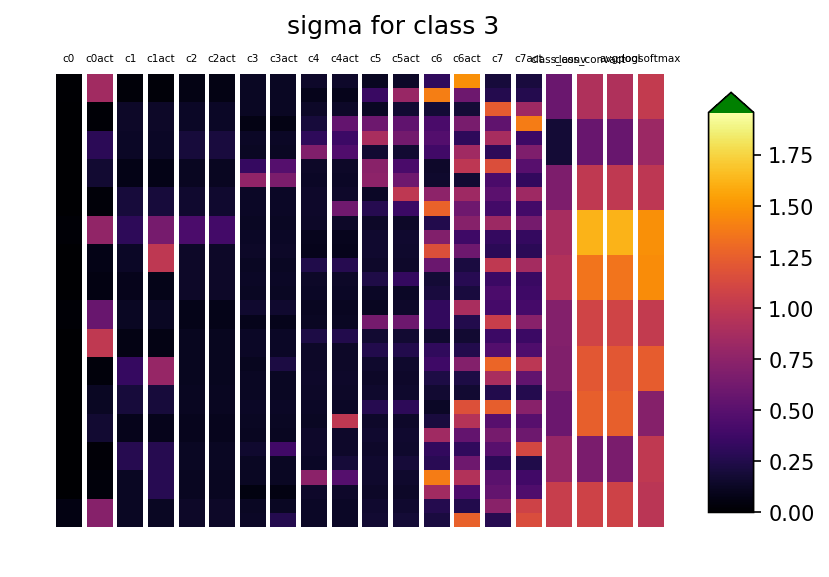

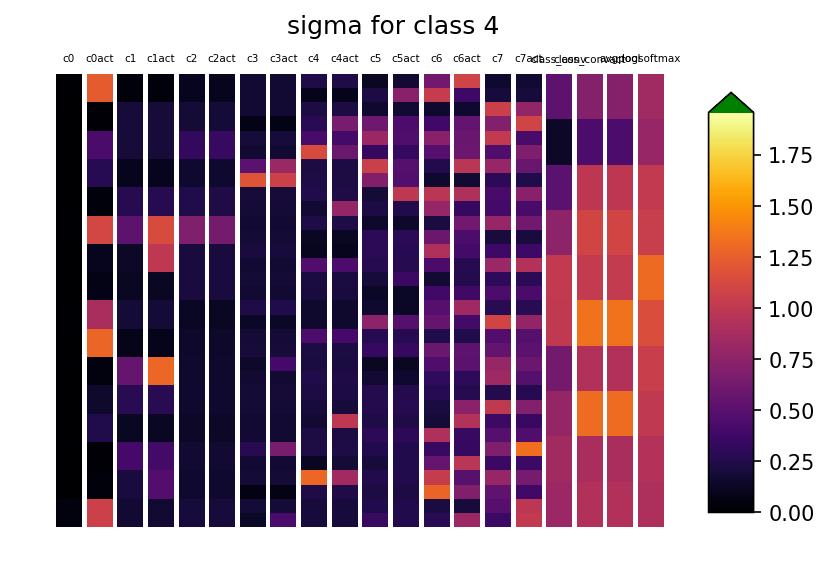

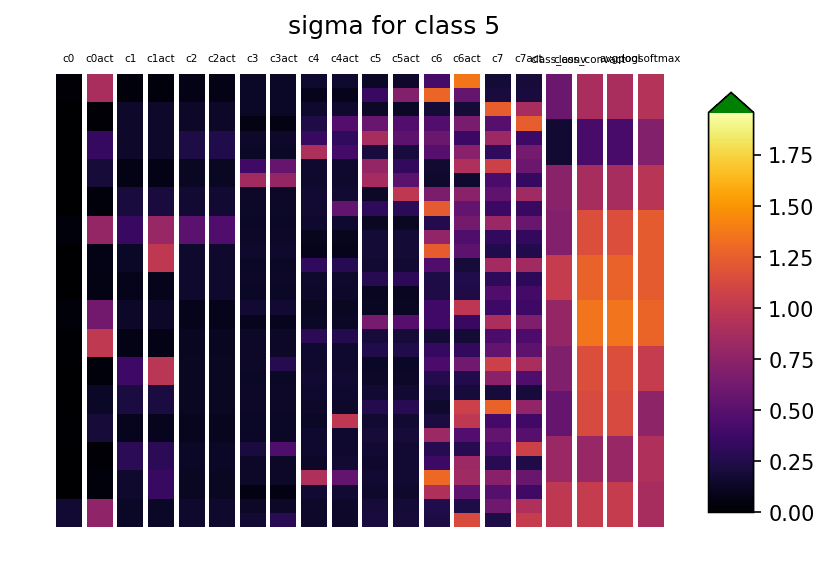

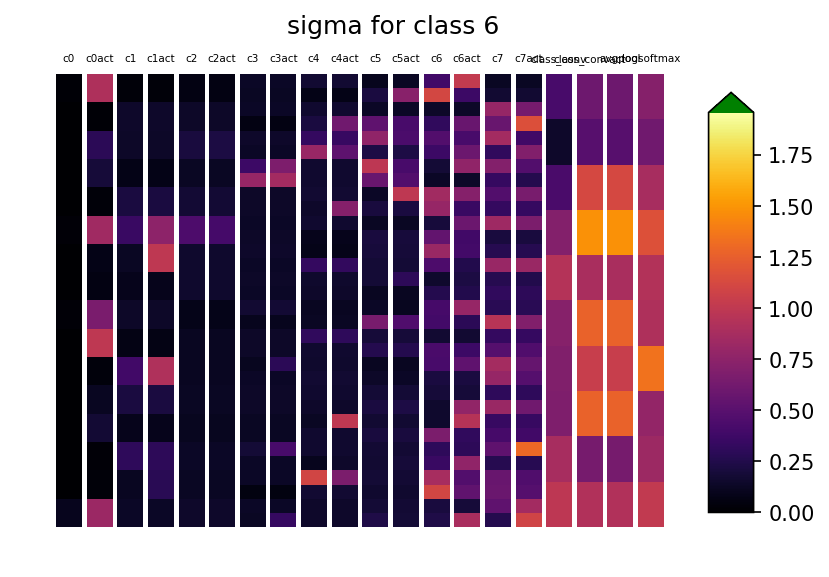

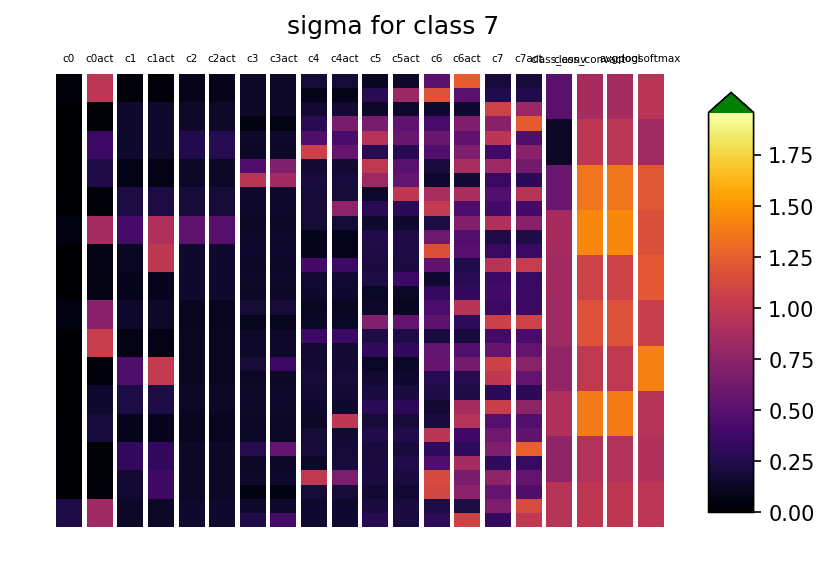

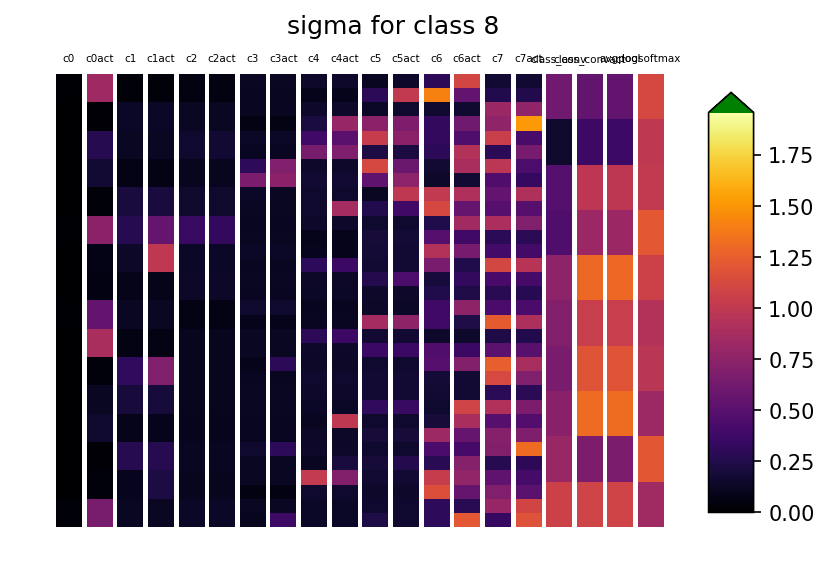

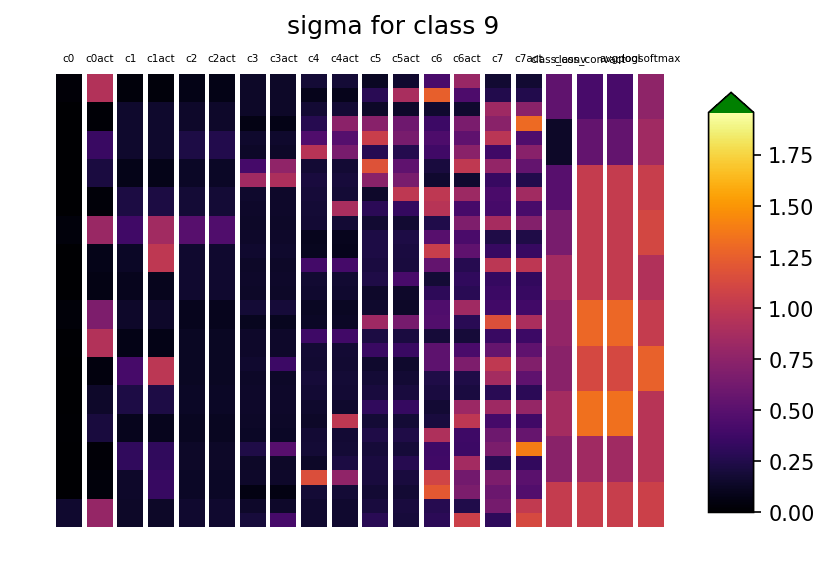

In [8]:

invariance.plot(invariance_measure,model,dataset.name,classes,savefig=True,savefig_suffix="unrotated",vmax=vmax_class)


In [9]:
rotated_invariance_measure_all_dataset,classes=invariance.run_all_dataset(rotated_model,dataset,config,rotations)
invariance_measure_all_dataset,classes=invariance.run_all_dataset(model,dataset,config,rotations)

vmin_all,vmax_all=invariance.outlier_range_both(rotated_invariance_measure,invariance_measure)




class 0
[(16,), (16,), (16,), (16,), (16,), (16,), (32,), (32,), (32,), (32,), (32,), (32,), (32,), (32,), (32,), (32,), (10,), (10,), (10,), (10,)]
[(16,), (16,), (16,), (16,), (16,), (16,), (32,), (32,), (32,), (32,), (32,), (32,), (32,), (32,), (32,), (32,), (10,), (10,), (10,), (10,)]


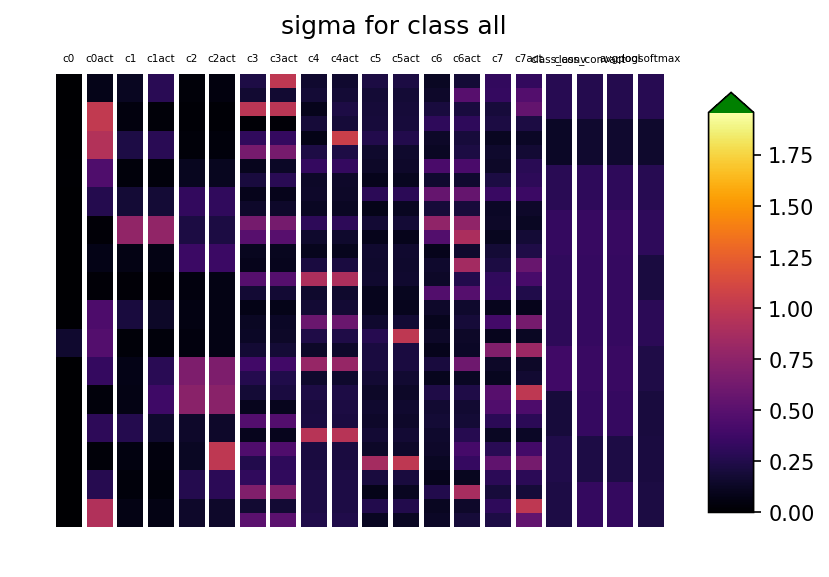

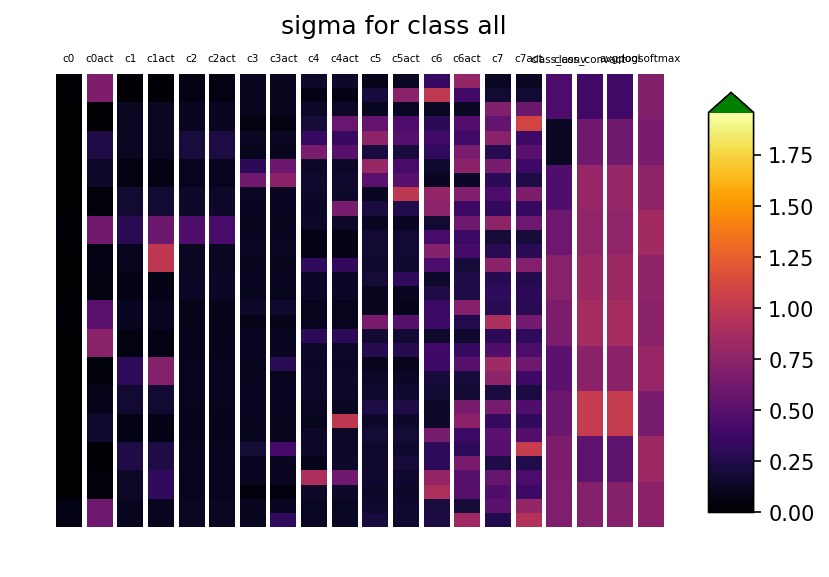

In [10]:

invariance.plot(rotated_invariance_measure_all_dataset,rotated_model,dataset.name,classes,
                savefig=True,savefig_suffix="rotated",class_names=["all"],vmax=vmax_all)
invariance.plot(invariance_measure_all_dataset,model,dataset.name,classes,
                savefig=True,savefig_suffix="unrotated",class_names=["all"],vmax=vmax_all)

20


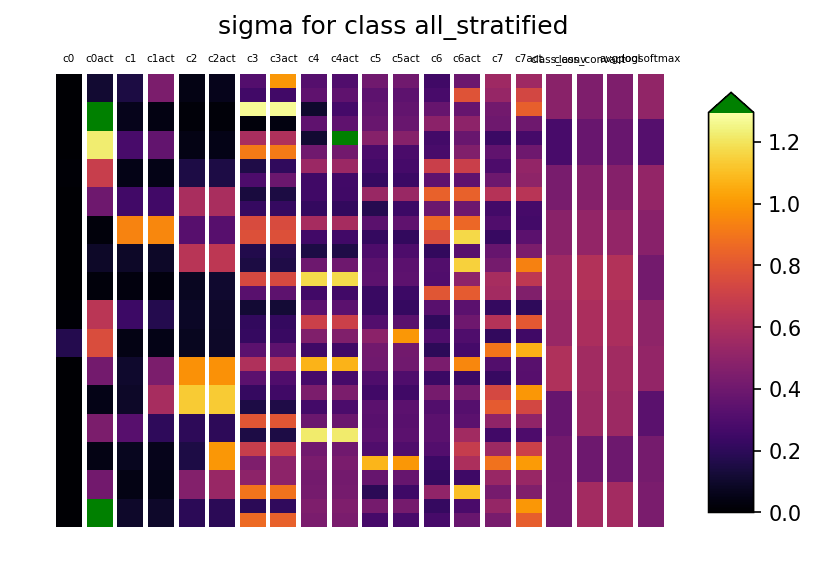

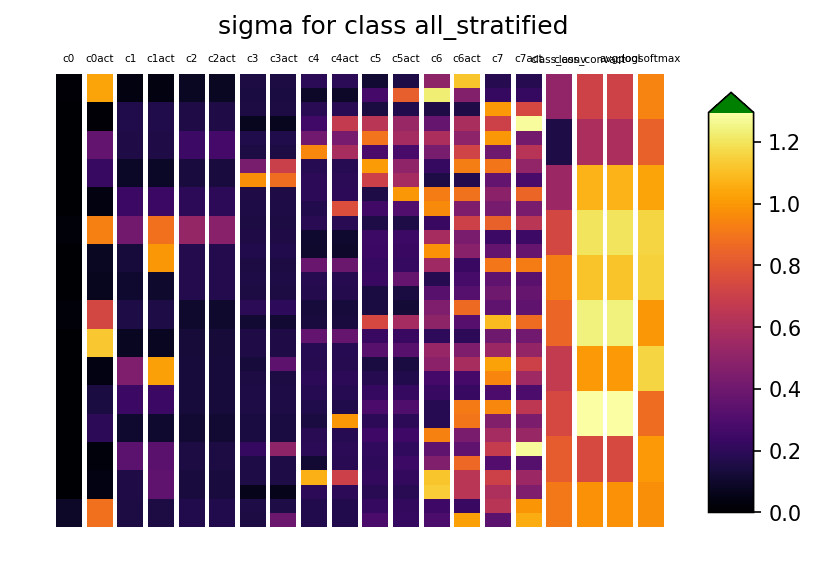

In [15]:
# for i in range(10):
#     print(f"class {i}")
#     print([rotated_invariance_measure[i][j].shape for j in range(20)])
#     print([invariance_measure[i][j].shape for j in range(20)])
    

rotated_layer_invariance_measure=invariance.eval_stratified_invariance(rotated_invariance_measure)
layer_invariance_measure=invariance.eval_stratified_invariance(invariance_measure)


vmin_stratified,vmax_stratified=invariance.outlier_range_both(rotated_layer_invariance_measure,layer_invariance_measure)

invariance.plot([rotated_layer_invariance_measure],rotated_model,dataset.name,classes,
                savefig=True,savefig_suffix="rotated",class_names=["all_stratified"],vmax=vmax_stratified)
invariance.plot([layer_invariance_measure],model,dataset.name,classes,
                savefig=True,savefig_suffix="unrotated",class_names=["all_stratified"],vmax=vmax_stratified)


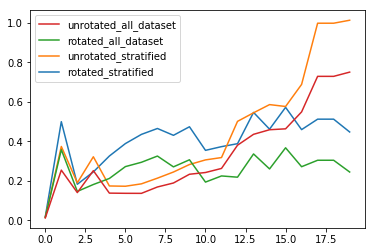

In [37]:
measures=[layer_invariance_measure]+invariance_measure_all_dataset
rotated_measures=[rotated_layer_invariance_measure]+rotated_invariance_measure_all_dataset
labels=["stratified","all_dataset"]

invariance.plot_collapsing_layers(rotated_measures,measures,rotated_model,model,dataset.name,labels)

# invariance.plot_collapsing_layers(,invariance_measure_all_dataset,rotated_model,model,dataset.name,["all_dataset"])
# invariance.plot_collapsing_layers([rotated_layer_invariance_measure],[layer_invariance_measure],rotated_model,model,dataset.name,["all_dataset_stratified"])



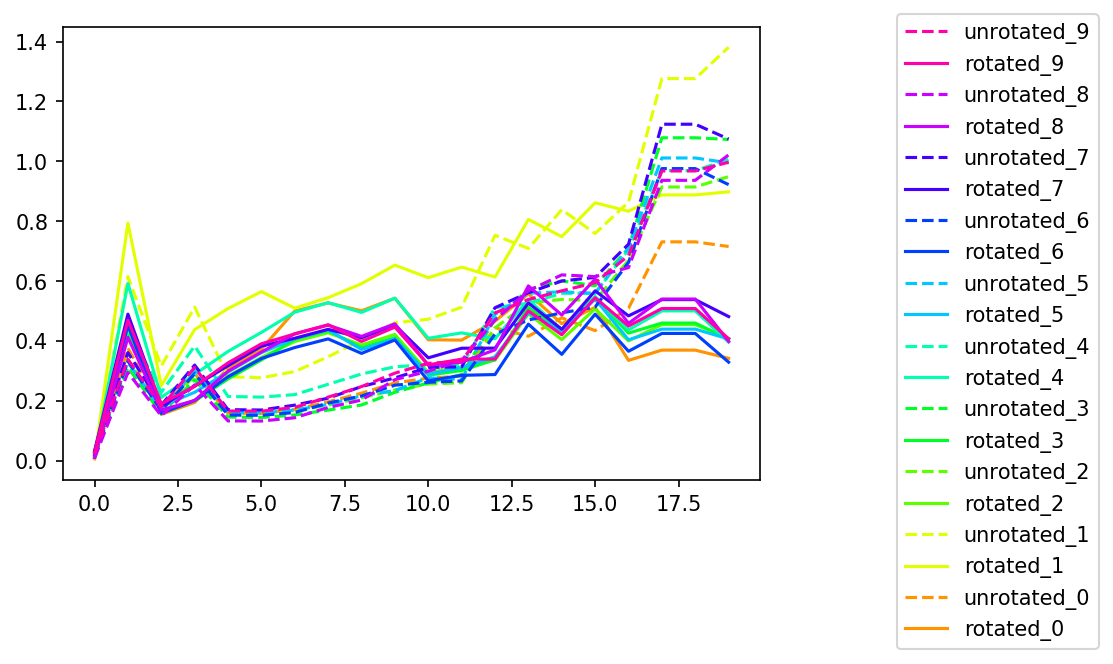

In [44]:
class_labels=[str(i) for i in range(num_classes)]
invariance.plot_collapsing_layers(rotated_invariance_measure,invariance_measure,rotated_model,model,dataset.name,class_labels)